In [5]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 


In [2]:

# Load the stored data object
save_file = './data/results/11132021_ov_scRNA_step2.h5ad'
adata = sc.read_h5ad(save_file)

In [6]:
print(adata.X.shape)


(73554, 2093)


In [12]:
adata2 = adata.raw.to_adata()  #it's normalized and logtransformed
print(adata2.X[1:10])


[[3.613061  0.        2.5669825 ... 0.        0.        0.       ]
 [3.6242435 0.        3.345412  ... 0.        0.        0.       ]
 [2.6841233 0.        3.1131346 ... 0.        0.        0.       ]
 ...
 [0.        0.        2.490563  ... 0.        0.        0.       ]
 [0.        0.        2.4630988 ... 0.        0.        0.       ]
 [1.6075206 0.        2.8309574 ... 0.        0.        0.       ]]


In [10]:
np.mean(adata2.X, axis = 0)

array([2.072344  , 0.04503291, 3.4708633 , ..., 0.06380318, 0.02486183,
       0.0038118 ], dtype=float32)

In [13]:
adata

AnnData object with n_obs × n_vars = 73554 × 2093
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
var_genes_all = adata.var.highly_variable


In [15]:
print("Highly variable genes: %d"%sum(var_genes_all))


Highly variable genes: 2093


In [17]:
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'sample')


extracting highly variable genes
    finished (0:00:24)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [18]:
print("Highly variable genes intersection: %d"%sum(adata2.var.highly_variable_intersection))

Highly variable genes intersection: 2


In [19]:
print("Number of batches where gene is variable:")
print(adata2.var.highly_variable_nbatches.value_counts())

Number of batches where gene is variable:
6     901
5     895
4     823
7     822
8     783
9     657
3     638
10    561
2     552
1     531
11    454
0     446
12    366
13    292
14    233
15    188
16    148
17    131
18     91
19     75
21     64
20     56
22     51
23     45
24     41
27     35
30     31
25     29
26     25
32     21
31     19
28     19
29     18
33     16
34     16
35     10
36      2
Name: highly_variable_nbatches, dtype: int64


In [20]:
var_genes_batch = adata2.var.highly_variable_nbatches > 0


In [23]:
adata2

AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [22]:
len(var_genes_batch)

10085

In [27]:
print("Any batch var genes: %d"%sum(var_genes_batch))
print("All data var genes: %d"%sum(var_genes_all))
print("Overlap: %d"%sum(var_genes_batch & var_genes_all))
print("Variable genes in all batches: %d"%sum(adata2.var.highly_variable_nbatches == 10))
print("Overlap batch instersection and all: %d"%sum(var_genes_all & adata2.var.highly_variable_intersection))

Any batch var genes: 9639
All data var genes: 2093
Overlap: 2092
Variable genes in all batches: 561
Overlap batch instersection and all: 2


In [28]:
var_select = adata2.var.highly_variable_nbatches > 2
var_genes = var_select.index[var_select]
len(var_genes)

8556

각각의 파일에서 나온 데이터를 따로 담는 dictionary 를 만든다.  

In [29]:
# split per batch into new objects.
batches = adata.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata2[adata2.obs['sample'] == batch,]

alldata    

{'CD45-1': View of AnnData object with n_obs × n_vars = 2804 × 10085
     obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
     uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
     obsm: 'X_pca', 'X_tsne', 'X_umap',
 'CD45-2': View of AnnData object with n_obs × n_vars = 1641 × 10085
     obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'disp

In [32]:
alldata.keys()

dict_keys(['CD45-1', 'CD45-2', 'CD45-3', 'CD45-4', 'CD45-5', 'CD45-6', 'CD45-7', 'CD45-8', 'CD45-9', 'CD45-10', 'CD45Stroma-1', 'CD45Stroma-2', 'CD45Stroma-3', 'CD45Stroma-4', 'CD45Stroma-5', 'CD45Stroma-6', 'CD45Stroma-7', 'CD45Stroma-8', 'CD45Stroma-9', 'CD45Stroma-10', 'CD45Stroma-11', 'CD45Stroma-12', 'CD45Stroma-13', 'Tumor-1', 'Tumor-2', 'Tumor-3', 'Tumor-4', 'Tumor-5', 'Tumor-6', 'Tumor-7', 'Tumor-8', 'Tumor-9', 'Tumor-10', 'Tumor-11', 'Tumor-12', 'Tumor-13'])

### Using Combat

In [33]:
# create a new object with lognormalized counts
adata_combat = sc.AnnData(X=adata.raw.X, var=adata.raw.var, obs = adata.obs)


In [35]:
adata_combat

AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [34]:
adata_combat.raw = adata_combat


combat 은 원본에다 바로 돌려도 된다. 

In [36]:
# run combat
sc.pp.combat(adata_combat, key='sample')


Standardizing Data across genes.

Found 36 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/home/ubuntu/pyenv/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Adjusting data



In [37]:
sc.pp.highly_variable_genes(adata_combat)


extracting highly variable genes
    finished (0:00:13)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [38]:
print("Highly variable genes: %d"%sum(adata_combat.var.highly_variable))

Highly variable genes: 1711


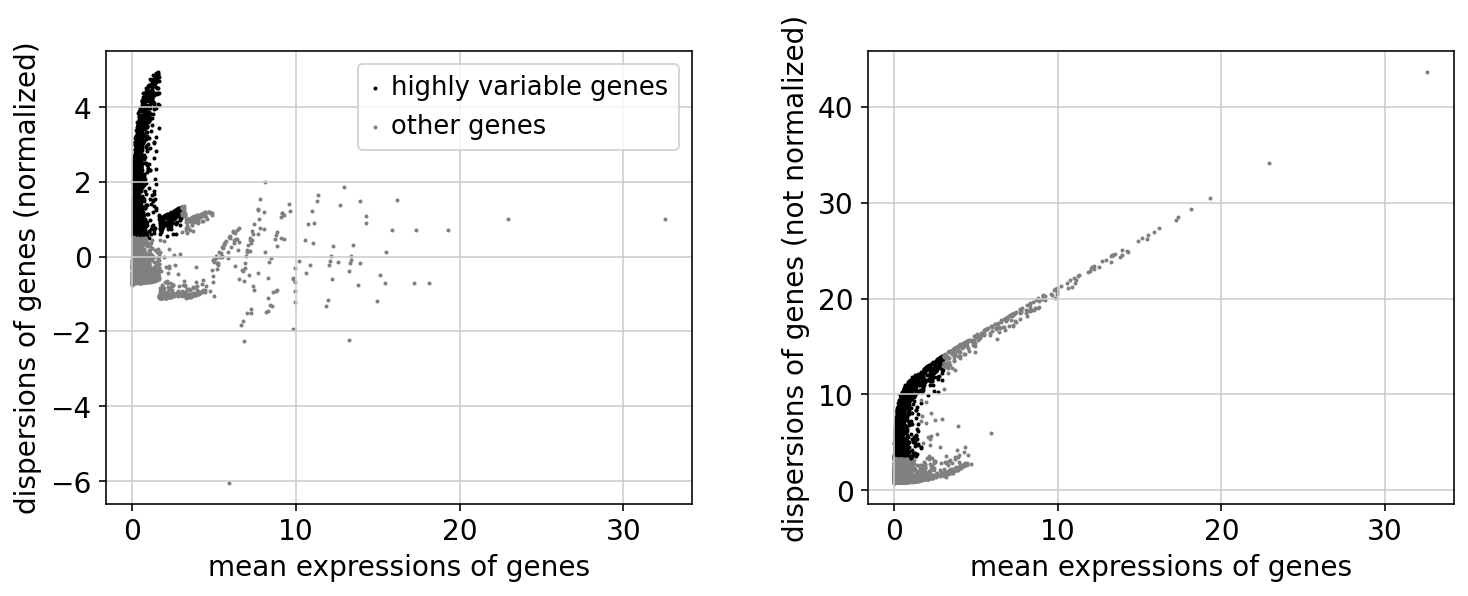

In [39]:
sc.pl.highly_variable_genes(adata_combat)


In [40]:
sc.pp.pca(adata_combat, n_comps=30, use_highly_variable=True, svd_solver='arpack')

sc.pp.neighbors(adata_combat, n_pcs =30)

sc.tl.umap(adata_combat)
sc.tl.tsne(adata_combat, n_pcs = 30)

computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:15)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:53)
computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:06:43)


It takes more than 10 miutes 

In [41]:
# compare var_genes
var_genes_combat = adata_combat.var.highly_variable
print("With all data %d"%sum(var_genes_all))
print("With combat %d"%sum(var_genes_combat))
print("Overlap %d"%sum(var_genes_all & var_genes_combat))

print("With 2 batches %d"%sum(var_select))
print("Overlap %d"%sum(var_genes_combat & var_select))

With all data 2093
With combat 1711
Overlap 806
With 2 batches 8556
Overlap 1668


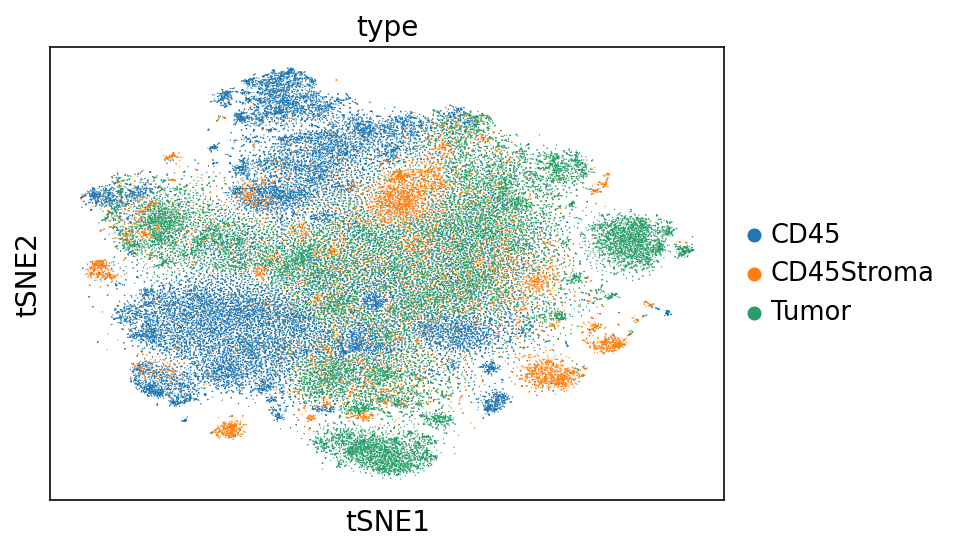

In [42]:
sc.pl.tsne(adata_combat, color='type')


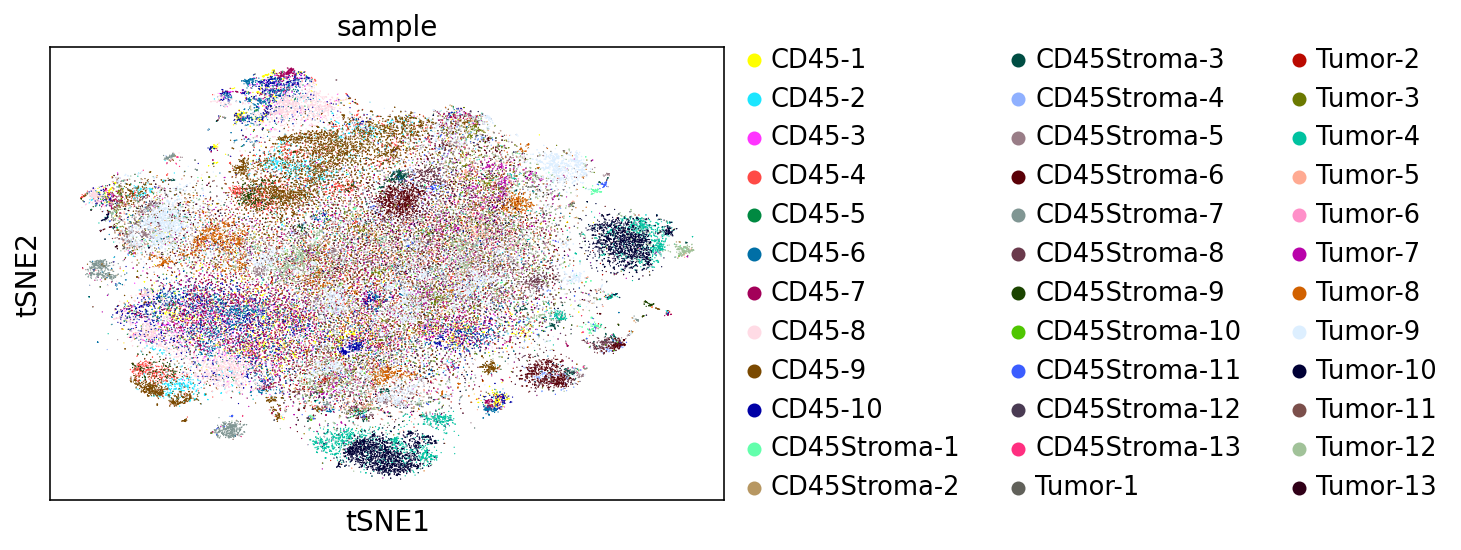

In [43]:
sc.pl.tsne(adata_combat, color='sample')


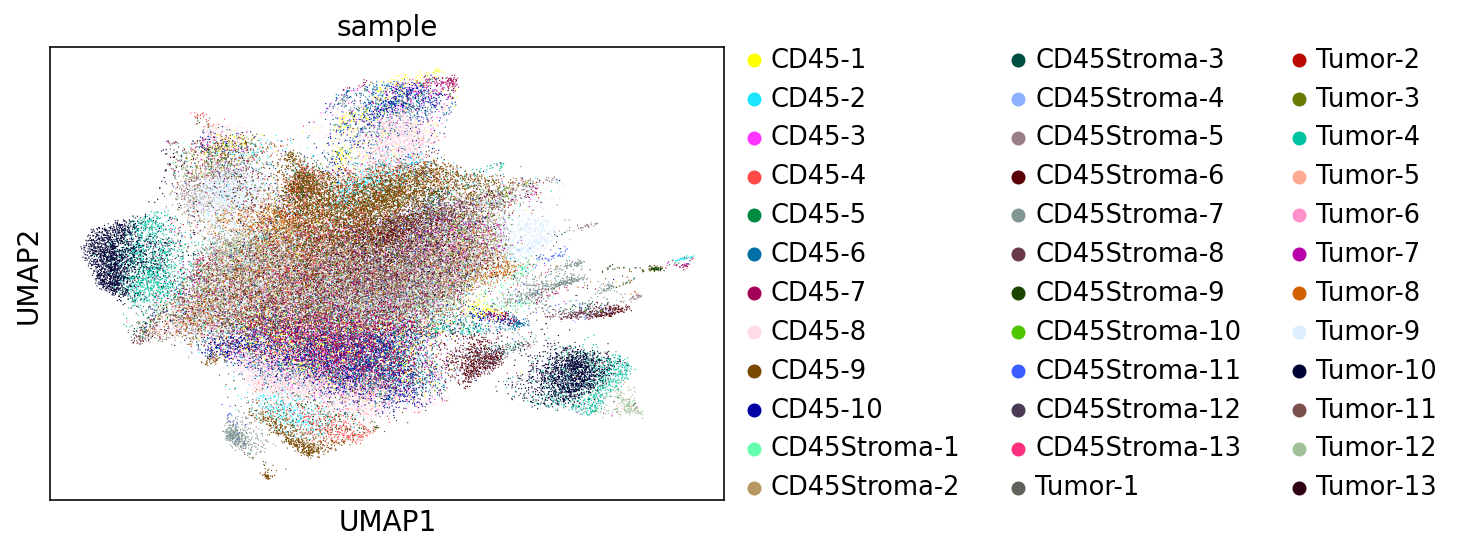

In [46]:
sc.pl.umap(adata_combat, color='sample')


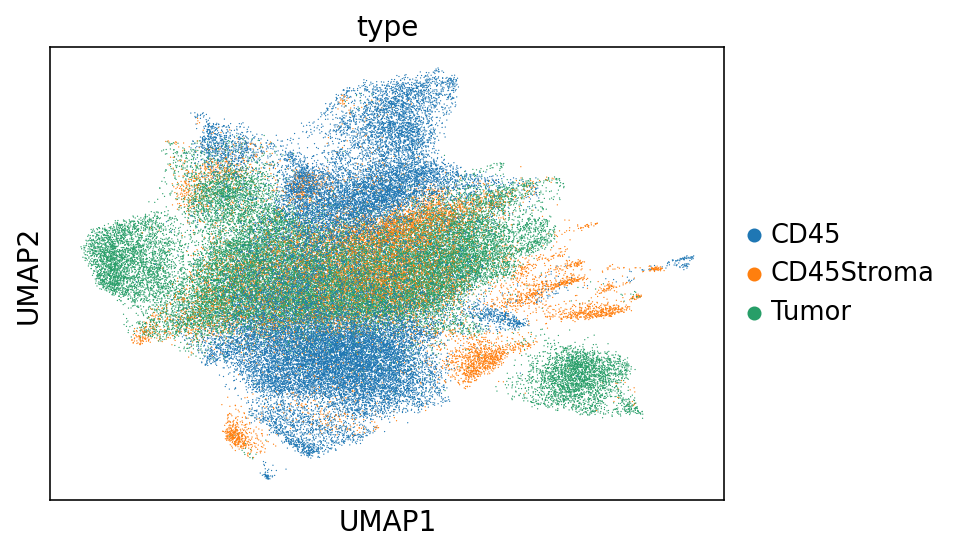

In [47]:
sc.pl.umap(adata_combat, color='type')


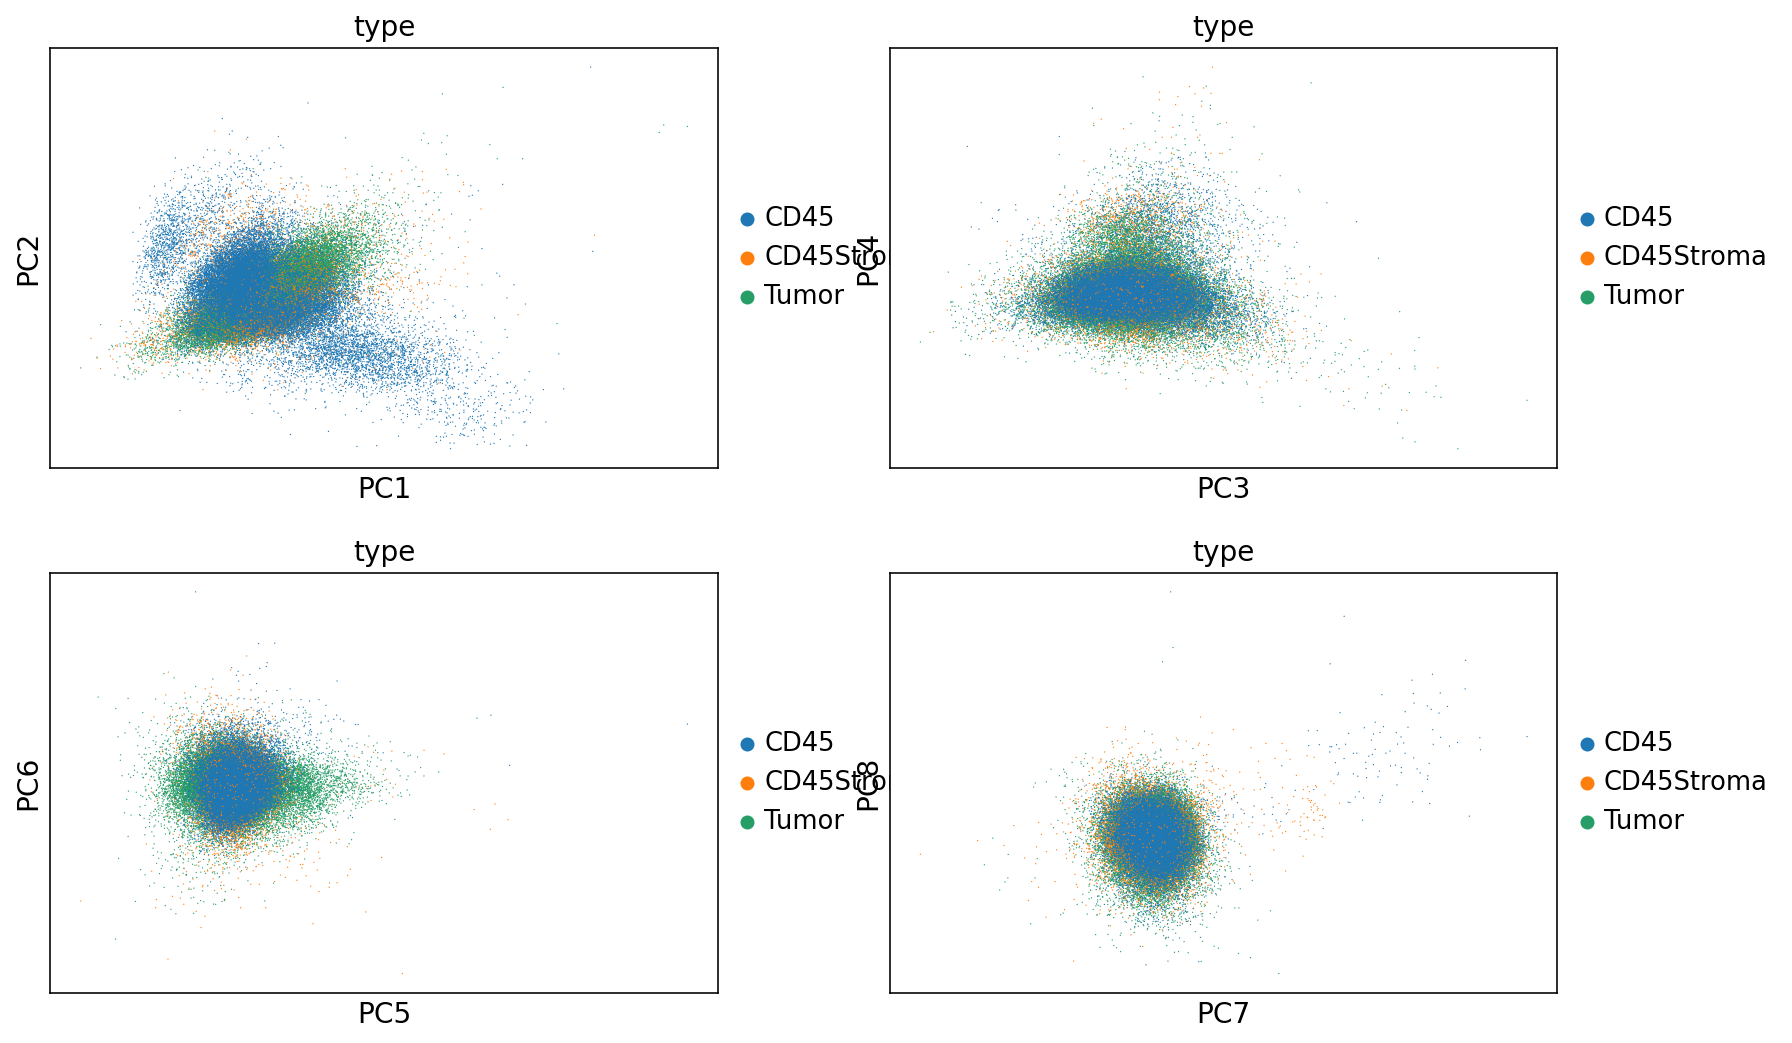

In [48]:
sc.pl.pca(adata_combat, color='type', components = ['1,2','3,4','5,6','7,8'], ncols=2)

In [49]:
#save to file
save_file = './data/results/11132021_ov_scrna_scanpy_combat_corrected_msy.h5ad'
adata.write_h5ad(save_file)